# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
df=pd.read_csv("/Users/duan/Google Drive/NHLS:09 machine learning project/HSLS_dataset2.csv")
df.dtypes
#dfall.info()
df

#We can also read in the original MS excel file directly from the website
#df=pd.read_excel("/Users/duan/Google Drive/NHLS:09 machine learning project/HSLS_dataset2.excel")

,STU_ID,X1TXMTSCOR,X2SEX,X2RACE,X2DUALLANG,X2TXMTSCOR,X2MOMEDU,X2DADEDU,X2FAMINCOME,X2SES,...,X3TAGPA10,X3TAGPA11,X3TAGPA12,X3TAGPA09,X3TAGPAWGT,Peer_influence,Teacher_support,Parents_Support,MathScore,Mathscore2
0,10001,59.3710,1,8,1,68.6447,6,6,11,1.5649,...,3.0,3.5,3.5,3.5,3.5,4.250000000000000,2.600000000000000,2.571428571428570,1.00,1.00
1,10002,47.6821,2,8,1,54.0863,4,2,3,-0.3307,...,4.0,3.5,4.0,4.0,4.0,2.250000000000000,2.600000000000000,3.857142857142860,0.00,1.00
2,10003,64.2431,2,3,1,55.6336,7,-9,6,1.0141,...,2.5,2.0,2.5,3.0,3.0,3.750000000000000,3.600000000000000,4.000000000000000,0.00,1.00
3,10004,49.2690,2,8,1,-9.0000,2,4,3,-0.3347,...,4.0,4.0,4.0,3.5,4.5,#NULL!,#NULL!,2.285714285714290,#NULL!,#NULL!
4,10005,62.5897,1,8,1,50.5818,5,-9,7,0.9661,...,3.0,3.5,3.0,3.0,3.5,#NULL!,#NULL!,3.714285714285710,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23498,35202,57.5729,2,5,1,52.2326,4,-9,3,0.5497,...,0.5,-9.0,-9.0,1.5,1.0,3.000000000000000,#NULL!,3.285714285714290,0.00,1.00
23499,35203,46.0488,2,5,1,48.0447,2,-9,2,-0.9328,...,2.0,2.0,1.0,2.5,2.0,4.250000000000000,3.200000000000000,#NULL!,0.00,0.00
23500,35204,49.7801,2,8,1,48.1044,2,2,5,-0.2205,...,2.5,2.0,2.0,3.0,2.5,3.250000000000000,3.400000000000000,3.714285714285710,0.00,0.00
23501,35205,61.3193,1,8,1,50.2191,6,-9,4,1.0032,...,1.0,2.0,2.5,1.5,1.5,2.500000000000000,1.400000000000000,3.285714285714290,0.00,0.00


In [3]:
df = df.iloc[:, np.r_[2,3,4,6,7,9, 11:17, 43:45,47]]
df

,X2SEX,X2RACE,X2DUALLANG,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support,Mathscore2
0,1,8,1,6,6,1.5649,-2.17,0.85,0.16,1.73,10,10,4.250000000000000,2.600000000000000,1.00
1,2,8,1,4,2,-0.3307,0.61,0.54,-0.42,-0.70,8,10,2.250000000000000,2.600000000000000,1.00
2,2,3,1,7,-9,1.0141,0.52,0.54,-1.54,-0.56,12,12,3.750000000000000,3.600000000000000,1.00
3,2,8,1,2,4,-0.3347,-9.00,-9.00,-9.00,-9.00,-9,9,#NULL!,#NULL!,#NULL!
4,1,8,1,5,-9,0.9661,1.21,-9.00,-9.00,-9.00,9,12,#NULL!,#NULL!,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23498,2,5,1,4,-9,0.5497,-0.58,-9.00,0.70,0.11,10,10,3.000000000000000,#NULL!,1.00
23499,2,5,1,2,-9,-0.9328,0.87,1.18,-0.42,0.11,4,2,4.250000000000000,3.200000000000000,0.00
23500,2,8,1,2,2,-0.2205,0.89,0.54,-0.42,1.73,10,12,3.250000000000000,3.400000000000000,0.00
23501,1,8,1,6,-9,1.0032,-0.23,-0.82,-1.54,-1.30,8,8,2.500000000000000,1.400000000000000,0.00


In [4]:
#df.rename({'STU_ID':'ID'},axis='columns', inplace=True)


In [5]:
df.drop('X2DUALLANG',axis=1, inplace=True) 
##set axis=0 to remove rows, axis to remove columns


In [6]:
df.dtypes

#int64 means that the data did not have mix letters and numbers. in other words, there is no NA values

X2SEX                int64
X2RACE               int64
X2MOMEDU             int64
X2DADEDU             int64
X2SES              float64
X2BEHAVEIN         float64
X2MEFFORT          float64
X2MTHID            float64
X2MTHEFF           float64
X2STUEDEXPCT         int64
X2PAREDEXPCT         int64
Peer_influence      object
Teacher_support     object
Mathscore2          object
dtype: object

In [7]:
df['X2SEX']
df['X2SEX'].unique()

array([1, 2])

In [8]:
#replace values in one column
#df['X2STUEDEXPCT'] = df['X2STUEDEXPCT'].replace(['#NULL!','NA'],'NaN')

df['X2STUEDEXPCT'] = df['X2STUEDEXPCT'].replace(13, np.nan)
df['X2PAREDEXPCT'] = df['X2PAREDEXPCT'].replace(13, np.nan)
df = df.replace(-9, np.nan)
#df.describe()

In [9]:
df = df.replace([-9,-8,-7,-6,-5,-4], np.nan)

df = df.replace('#NULL!', np.nan)
df

,X2SEX,X2RACE,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support,Mathscore2
0,1,8,6.0,6.0,1.5649,-2.17,0.85,0.16,1.73,10.0,10.0,4.250000000000000,2.600000000000000,1.00
1,2,8,4.0,2.0,-0.3307,0.61,0.54,-0.42,-0.70,8.0,10.0,2.250000000000000,2.600000000000000,1.00
2,2,3,7.0,NaN,1.0141,0.52,0.54,-1.54,-0.56,12.0,12.0,3.750000000000000,3.600000000000000,1.00
3,2,8,2.0,4.0,-0.3347,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
4,1,8,5.0,NaN,0.9661,1.21,NaN,NaN,NaN,9.0,12.0,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23498,2,5,4.0,NaN,0.5497,-0.58,NaN,0.70,0.11,10.0,10.0,3.000000000000000,NaN,1.00
23499,2,5,2.0,NaN,-0.9328,0.87,1.18,-0.42,0.11,4.0,2.0,4.250000000000000,3.200000000000000,0.00
23500,2,8,2.0,2.0,-0.2205,0.89,0.54,-0.42,1.73,10.0,12.0,3.250000000000000,3.400000000000000,0.00
23501,1,8,6.0,NaN,1.0032,-0.23,-0.82,-1.54,-1.30,8.0,8.0,2.500000000000000,1.400000000000000,0.00


In [10]:
df_no_missing=df.dropna()

In [11]:
len(df_no_missing)

9333

In [12]:
df_no_missing['X2STUEDEXPCT'].unique()

array([10.,  8.,  6.,  9., 12.,  2., 11.,  4.,  7.,  3.,  5.,  1.])

In [13]:
df['X2STUEDEXPCT'].unique()

array([10.,  8., 12., nan,  9.,  6.,  4.,  2.,  3.,  7.,  1., 11.,  5.])

In [14]:
df['X2STUEDEXPCT'].describe()

count    18488.000000
mean         8.053332
std          2.961751
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: X2STUEDEXPCT, dtype: float64

In [15]:
df_no_missing.isna().sum()  # count missing values in the dataset

X2SEX              0
X2RACE             0
X2MOMEDU           0
X2DADEDU           0
X2SES              0
X2BEHAVEIN         0
X2MEFFORT          0
X2MTHID            0
X2MTHEFF           0
X2STUEDEXPCT       0
X2PAREDEXPCT       0
Peer_influence     0
Teacher_support    0
Mathscore2         0
dtype: int64

# Dealing with missing data

Since scikit-learn's support vector machine do not support datasets with missing values. we can either delete these missing values from the training dataset, or impute values for the missing data

This is the another way for cleaning missing values. For example, 
#len(df.loc[(df['X2STUEDEXPCT']==13)| (df['X2PAREDEXPCT']==13)]) ### | is or; & is and

In [16]:
len(df)

23503

In [17]:
#len(df.loc[(df['X2STUEDEXPCT']==13)| (df['X2PAREDEXPCT']==13)]) ### | is or; & is and

In [18]:
#df_no_missing = df.loc[(df['X2STUEDEXPCT']!=13) & (df['X2PAREDEXPCT']!=13)]

In [19]:
#len(df_no_missing)

In [20]:
df_no_missing['X2STUEDEXPCT'].unique()

array([10.,  8.,  6.,  9., 12.,  2., 11.,  4.,  7.,  3.,  5.,  1.])

In [21]:
df_no_missing['Mathscore2'].unique()

array(['1.00', '0.00'], dtype=object)

# Downsample the data
Support vector machines are great with small datasets, but not awesome with large ones. 
A large sample size (e.g. 30,000) will take a long time to optimize with cross validation. so we need to downsample to 1000

In [22]:
df_no_missing["Mathscore2"] = df_no_missing["Mathscore2"].astype(float)

In [23]:
df_no_missing.dtypes

X2SEX                int64
X2RACE               int64
X2MOMEDU           float64
X2DADEDU           float64
X2SES              float64
X2BEHAVEIN         float64
X2MEFFORT          float64
X2MTHID            float64
X2MTHEFF           float64
X2STUEDEXPCT       float64
X2PAREDEXPCT       float64
Peer_influence      object
Teacher_support     object
Mathscore2         float64
dtype: object

In [24]:
df_pass = df_no_missing[df_no_missing['Mathscore2']==1.00]
df_fail = df_no_missing[df_no_missing['Mathscore2']==0.00]

In [25]:
len(df_pass)

5481

In [26]:
df_fail

,X2SEX,X2RACE,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support,Mathscore2
6,2,8,2.0,2.0,0.3021,0.39,-2.12,0.12,-1.09,8.0,12.0,3.000000000000000,1.800000000000000,0.0
25,1,8,5.0,7.0,1.8353,0.74,0.15,-1.54,-2.50,6.0,8.0,3.000000000000000,1.400000000000000,0.0
35,2,2,5.0,5.0,0.5667,0.11,0.19,1.82,0.32,12.0,12.0,3.250000000000000,2.800000000000000,0.0
47,2,8,4.0,3.0,0.2486,0.70,-0.13,-0.46,-0.03,2.0,8.0,3.000000000000000,2.000000000000000,0.0
49,2,6,2.0,2.0,-0.7542,-2.10,-0.14,-0.42,0.11,10.0,10.0,3.250000000000000,2.400000000000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,1,8,4.0,4.0,0.3175,-1.70,-1.11,-1.54,-1.38,8.0,12.0,3.333333333333330,1.600000000000000,0.0
23480,2,8,4.0,4.0,0.6946,0.71,-0.13,0.70,0.93,8.0,8.0,2.750000000000000,1.800000000000000,0.0
23485,1,8,2.0,3.0,-0.4960,0.28,-3.77,-1.54,-1.09,4.0,4.0,2.000000000000000,1.600000000000000,0.0
23488,2,3,2.0,2.0,-0.6767,-1.64,-0.43,-1.54,0.11,10.0,10.0,3.000000000000000,2.800000000000000,0.0


In [27]:
df_pass_downsampled = resample(df_pass, 
                               replace= False,  ##we pull something out of there and we put it in our new data frame. we do not put that back in the pool of possible that we could select again
                               n_samples=1000,  ## 1000 rows in our new dataframe
                               random_state=42) ## random_state is random seed

len(df_pass_downsampled)

1000

In [28]:
df_fail_downsampled = resample(df_fail, 
                               replace= False,  ##we pull something out of there and we put it in our new data frame. we do not put that back in the pool of possible that we could select again
                               n_samples=1000,  ## 1000 rows in our new dataframe
                               random_state=42) ## random_state is random seed

len(df_fail_downsampled)

1000

Merge the two new downsampled datasets into a single dataframe using concat

In [29]:
df_downsample = pd.concat([df_fail_downsampled,df_pass_downsampled])
len(df_downsample)

2000

# Format Data part 1: split the data into dependent and independent variables

We are start formating the data for making a Support Vector Machine. 

The first step is to split the data into two parts:

1. the columns of data that we will use to make classifications
2. the column of data that we want to predict

NOTE: the reason we deal with missing data before spliting it into X and y is that if we remove rows, splitting after ensures that each row in X correctly corresponds with the appropriate value in y.

NOTE: in the code below we are using copy() to copy the data by value. By default, pandas uses copy by reference. Using copy() ensures that the original data df_downsample is not modified when we modified X or y. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy df_downsample, rather than reload the original data and remove the missing values etc. 

In [30]:
X = df_downsample. drop ('Mathscore2', axis=1).copy() #alternatively: X = df_no_missing.iloc[:,:-1].copy()
X

,X2SEX,X2RACE,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support
19571,1,8,6.0,2.0,0.8060,-0.71,-0.53,-0.42,-0.70,6.0,6.0,4.000000000000000,3.000000000000000
2797,2,8,5.0,5.0,0.5313,0.11,-0.14,-0.42,0.11,7.0,8.0,3.250000000000000,2.600000000000000
1678,2,5,2.0,2.0,-0.0373,0.71,1.18,1.24,0.50,6.0,8.0,2.500000000000000,3.600000000000000
23096,2,5,1.0,1.0,-0.7174,-0.74,-0.45,0.70,-0.15,11.0,4.0,2.666666666666670,3.500000000000000
10267,1,8,2.0,6.0,0.3266,-0.54,-2.82,-0.42,-1.65,8.0,4.0,4.250000000000000,1.400000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2,8,5.0,5.0,0.8698,0.25,0.19,0.12,0.32,12.0,12.0,3.250000000000000,3.000000000000000
16451,1,8,6.0,5.0,1.4404,1.06,1.18,1.82,1.73,10.0,10.0,4.000000000000000,3.600000000000000
19258,2,8,2.0,2.0,-0.0936,0.87,0.19,0.16,-0.24,10.0,10.0,3.000000000000000,3.200000000000000
7410,1,2,5.0,7.0,1.8797,1.03,0.52,-0.42,1.73,12.0,12.0,3.750000000000000,3.400000000000000


In [31]:
y = df_downsample['Mathscore2'].copy()
y

19571    0.0
2797     0.0
1678     0.0
23096    0.0
10267    0.0
        ... 
3525     1.0
16451    1.0
19258    1.0
7410     1.0
12684    1.0
Name: Mathscore2, Length: 2000, dtype: float64

# Format Data part 1: One-Hot Encoding

Variables of SEX and race are supposed to be categorical and need to be modified. This is because, while scikit learn support vetor machine natively support continuous data. they do not natively suport categorical data. therefore, we have to use a trick that converts a column of categoroical data into multiple column of binary values (dummy). this trick is called One-Hot Encoding.

In [32]:
pd.get_dummies(X, columns=['X2SEX']).head()

,X2RACE,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support,X2SEX_1,X2SEX_2
19571,8,6.0,2.0,0.8060,-0.71,-0.53,-0.42,-0.70,6.0,6.0,4.000000000000000,3.000000000000000,1,0
2797,8,5.0,5.0,0.5313,0.11,-0.14,-0.42,0.11,7.0,8.0,3.250000000000000,2.600000000000000,0,1
1678,5,2.0,2.0,-0.0373,0.71,1.18,1.24,0.50,6.0,8.0,2.500000000000000,3.600000000000000,0,1
23096,5,1.0,1.0,-0.7174,-0.74,-0.45,0.70,-0.15,11.0,4.0,2.666666666666670,3.500000000000000,0,1
10267,8,2.0,6.0,0.3266,-0.54,-2.82,-0.42,-1.65,8.0,4.0,4.250000000000000,1.400000000000000,1,0


In [33]:
pd.get_dummies(X, columns=['X2RACE'])

,X2SEX,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,Teacher_support,X2RACE_1,X2RACE_2,X2RACE_3,X2RACE_4,X2RACE_5,X2RACE_6,X2RACE_7,X2RACE_8
19571,1,6.0,2.0,0.8060,-0.71,-0.53,-0.42,-0.70,6.0,6.0,4.000000000000000,3.000000000000000,0,0,0,0,0,0,0,1
2797,2,5.0,5.0,0.5313,0.11,-0.14,-0.42,0.11,7.0,8.0,3.250000000000000,2.600000000000000,0,0,0,0,0,0,0,1
1678,2,2.0,2.0,-0.0373,0.71,1.18,1.24,0.50,6.0,8.0,2.500000000000000,3.600000000000000,0,0,0,0,1,0,0,0
23096,2,1.0,1.0,-0.7174,-0.74,-0.45,0.70,-0.15,11.0,4.0,2.666666666666670,3.500000000000000,0,0,0,0,1,0,0,0
10267,1,2.0,6.0,0.3266,-0.54,-2.82,-0.42,-1.65,8.0,4.0,4.250000000000000,1.400000000000000,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2,5.0,5.0,0.8698,0.25,0.19,0.12,0.32,12.0,12.0,3.250000000000000,3.000000000000000,0,0,0,0,0,0,0,1
16451,1,6.0,5.0,1.4404,1.06,1.18,1.82,1.73,10.0,10.0,4.000000000000000,3.600000000000000,0,0,0,0,0,0,0,1
19258,2,2.0,2.0,-0.0936,0.87,0.19,0.16,-0.24,10.0,10.0,3.000000000000000,3.200000000000000,0,0,0,0,0,0,0,1
7410,1,5.0,7.0,1.8797,1.03,0.52,-0.42,1.73,12.0,12.0,3.750000000000000,3.400000000000000,0,1,0,0,0,0,0,0


In [34]:
X_encoded = pd.get_dummies(X, columns=['X2SEX','X2RACE'])
X_encoded

,X2MOMEDU,X2DADEDU,X2SES,X2BEHAVEIN,X2MEFFORT,X2MTHID,X2MTHEFF,X2STUEDEXPCT,X2PAREDEXPCT,Peer_influence,...,X2SEX_1,X2SEX_2,X2RACE_1,X2RACE_2,X2RACE_3,X2RACE_4,X2RACE_5,X2RACE_6,X2RACE_7,X2RACE_8
19571,6.0,2.0,0.8060,-0.71,-0.53,-0.42,-0.70,6.0,6.0,4.000000000000000,...,1,0,0,0,0,0,0,0,0,1
2797,5.0,5.0,0.5313,0.11,-0.14,-0.42,0.11,7.0,8.0,3.250000000000000,...,0,1,0,0,0,0,0,0,0,1
1678,2.0,2.0,-0.0373,0.71,1.18,1.24,0.50,6.0,8.0,2.500000000000000,...,0,1,0,0,0,0,1,0,0,0
23096,1.0,1.0,-0.7174,-0.74,-0.45,0.70,-0.15,11.0,4.0,2.666666666666670,...,0,1,0,0,0,0,1,0,0,0
10267,2.0,6.0,0.3266,-0.54,-2.82,-0.42,-1.65,8.0,4.0,4.250000000000000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,5.0,5.0,0.8698,0.25,0.19,0.12,0.32,12.0,12.0,3.250000000000000,...,0,1,0,0,0,0,0,0,0,1
16451,6.0,5.0,1.4404,1.06,1.18,1.82,1.73,10.0,10.0,4.000000000000000,...,1,0,0,0,0,0,0,0,0,1
19258,2.0,2.0,-0.0936,0.87,0.19,0.16,-0.24,10.0,10.0,3.000000000000000,...,0,1,0,0,0,0,0,0,0,1
7410,5.0,7.0,1.8797,1.03,0.52,-0.42,1.73,12.0,12.0,3.750000000000000,...,1,0,0,1,0,0,0,0,0,0


# Format Data part 3: Centering and Scaling

The Radial Basis Function (RBF) that we are using with our SVM assumes that teh data are centering and scaled. In other words, each column should have a mean value = 0 and a standard deviation =1. So we need to do this to oth the training and testing datasets.

NOTE: We split the data into training and testing datasets and then scale them separately to avoid Data leakage. Data leakage occurs when information about the training dataset corrupts or influence the testing dataset.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42) ## the default set may is 70% for training and 30% for testing
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

# Build a preliminary Support Vector Machine 

In [36]:
y_train

6535     1.0
7718     0.0
1098     0.0
6495     1.0
22228    1.0
        ... 
3614     1.0
4413     1.0
11547    0.0
21694    1.0
10212    1.0
Name: Mathscore2, Length: 1500, dtype: float64

In [37]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

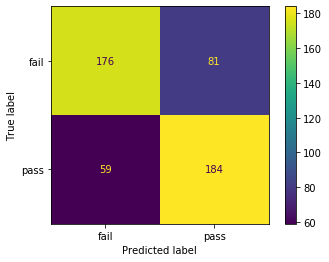

In [38]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["fail","pass"])

In the confusion matrix, we see that the 235 people that fail math test, 176 (74.9%) were correctly classified. And of the 265 people that passed the math exam, 184 (69.4%) were correctly classified. So the SVM was not awesome. So we need to imporve predictions using Cross vaidation to optimize the paremeters.

Q: what is the cutoff value for confusion matrix?

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a Support Vector Machine is all about finding the best value for gamma, and, potentially, the regularization parameter, C. We are trying to find better parameters values using cross validation in hope that we can imporve the accurary woth the Testing dataset.

Since we have two parpameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for gramma and C, and GridSearchCV() tests all possible combinations of the parameters for us.

When we optimize SVM is all about finding the best value for gamma and C (C is poentially the regularization parameter)

In [39]:
## We sepecifiy the paremeter we want to try
param_grid = [
    {'C':[0.5, 1, 10, 100], # NOTE: values for C must be >0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel':['rbf']} ## we can try other metthods, but it will take a long time. we use the radial basis function, it typically give us the best performance
    ]

##NOTE: we are including C=1 and gamma='scale'
  ##  as possible choices since they are the default values.
    

In [40]:
optimal_params = GridSearchCV(
                SVC(),
                param_grid,
                cv = 5, ##cv is the number of folds of Kraft cross-validation we want to do
                scoring ='accuracy', ## can also try different metrics and find the largest improvment
    ## scoring = 'balanced_accuracy'
    ## scoring = 'fi'
                 verbose = 0
                ) 

## if we want to see what Grid Search is doing, set verbose =2 
    
optimal_params.fit(X_train_scaled, y_train)
    
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

And we can see that the ideal value for C is 10, which means we will use regularization, and ideal value for gamma is 0.001

# Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine

We have alrady had the ideal values for C and gamma for building the final SVM

In [41]:
clf_svm=SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

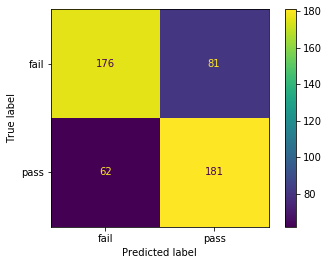

In [42]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["fail","pass"])

the results from the optimized SVM are no better/ just a lit better than before.

In other words, the SVM was pretty straight out of the box without optimization. This makes SVMs a great,quick, and dirty method for relative small datasets.

Note: Although classification with this dataset and an SVM is not awesome, it may better than other methods, We'd have to compare to find out.

# Draw the decision boundary

quantity how good if approximation

In [43]:
len(df_downsample.columns)

14

14 columns means it would require a 14 dimentional graph, one dimentional/per feature used to make predictions.

We will use PCA to combine the 14 features into 2 orthogonal meta-features that we can use as aces for a graph. PCA is a way to shrink a 14-dimentional graph into a 2-dimentional graph.

Radial basis functions operates in infinite dimentions

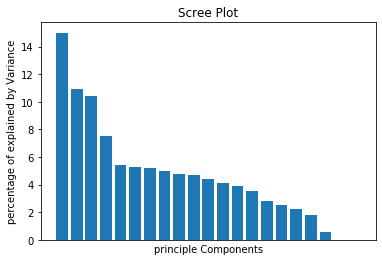

In [44]:
pca = PCA() #NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels= [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
     axis='x',
     which='both',
     bottom=False,
     top=False,
     labelbottom=False)

plt.ylabel('percentage of explained by Variance')
plt.xlabel('principle Components')
plt.title('Scree Plot')
plt.show()

## This scree plot tell us how good this approximation of the ture classifier is 

the first two columns(factors) were used for the new dataset would accurately reflect the original data

the scree plot shows that the first factor, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much diffferent from PC3 and PC4, which does not bode well for dimention reduction. Since we do not have a choice, let us go with it, but do not be suprised if the final graph looks funky.

In [45]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

##NOTE:
## PC1 contains the x-axis corrdinates of the data after PCA
## PC2 contains the Y-axis corrdinates of the data after PCA

##Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

##Now we optimize the SVM fit to the x and y-axis coordinates
##of the data after PCA dimension reduction...



In [46]:
## we retaining and re optimizing a SVM on just those two columns that we collapse the data down to


param_grid = [
    {'C':[1, 10, 100, 1000], # NOTE: values for C must be >0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel':['rbf']} ## we can try other metthods, but it will take a long time. we use the radial basis function, it typically give us the best performance
    ]


optimal_params = GridSearchCV(
                SVC(),
                param_grid,
                cv = 5, ##cv is the number of folds of Kraft cross-validation we want to do
                scoring ='accuracy', ## can also try different metrics and find the largest improvment
                 verbose = 0
                ) 

    
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

## we got the different optimized parameters, becaseu we used the new datasets, that just include two columns now
## it is a approximating what we did with the 14 columns

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


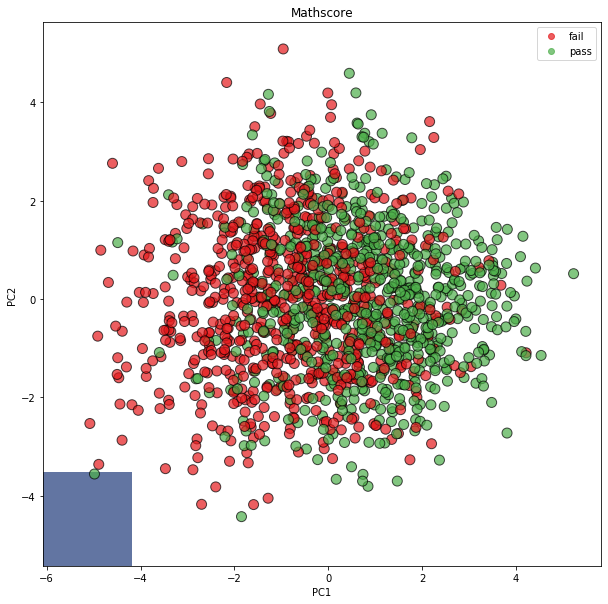

In [60]:
clf_svm=SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

##Transfrom the test dataset with the PCA
X_test_pca=pca.transform(X_train_scaled)
test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.min()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.min()+1

xx,yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

fig, ax = plt.subplots(figsize=(10,10))

Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
                  
Z = Z.reshape(xx.shape)


#cm = plt.cm.RdBu
#ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
ax.contourf(xx, yy, Z, alpha=0.8)
cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])
                  
scatter= ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                   cmap=cmap,
                   s=100,
                   edgecolors='k',
                   alpha=0.7)

legend=ax.legend(scatter.legend_elements()[0],
                scatter.legend_elements()[1],
                loc="upper right")
                  
legend.get_texts()[0].set_text("fail")
legend.get_texts()[1].set_text("pass")
                  
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Mathscore')
                  
plt.show()

##the figure is based on training data

##Q:  can not Plot the decision boundary and assign a color to each